In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/home/coder/gretel'

In [2]:
from src.evaluation.evaluator_manager import EvaluatorManager

config_file_path = module_path + '/examples/config/config_tree-cycles_tree-cycles-custom-oracle_countergan.json'
output_file_path = module_path + '/examples/output/tree_cycles_custom_oracle/countergan_fit_on_tree-cycles_instances-100_nodes_per_inst-28_nodes_in_cycles-7_fold_id_0/results_run-0.json'
output_folder = module_path + '/examples/output/'
stats_folder = module_path + '/examples/stats/'

# Verifying that the paths are valid
(os.path.isfile(config_file_path), os.path.isfile(output_file_path), os.path.isdir(output_folder), os.path.isdir(stats_folder))

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(True, True, True, True)

### Executing the pipeline

In [3]:
# The run number is a way to differentiate many runs of the same configurations
eval_manager = EvaluatorManager(config_file_path, run_number=0)
# Creating the evaluation pipelines
eval_manager.create_evaluators()
# Evaluating the explainers
eval_manager.evaluate()

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:173: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 34: CUDA driver is a stub library (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Iteration [0/100] [0]	Loss_D: 1.393821120262146	Loss_G: 0.6763424873352051	D(x): 0.5062578320503235	D(G(z)): 0.5098834037780762 / 0.5084733366966248
Iteration [0/100] [1]	Loss_D: 1.4494904279708862	Loss_G: 0.674691379070282	D(x): 0.5203542113304138	D(G(z)): 0.5107017159461975 / 0.5093135833740234
Iteration [0/100] [2]	Loss_D: 1.4418423175811768	Loss_G: 0.6827101111412048	D(x): 0.48566117882728577	D(G(z)): 0.5130521059036255 / 0.5052458643913269
Iteration [0/100] [3]	Loss_D: 1.4170963764190674	Loss_G: 0.6865092515945435	D(x): 0.498889297246933	D(G(z)): 0.5162408351898193 / 0.5033299922943115
Iteration [0/100] [4]	Loss_D: 1.3740222454071045	Loss_G: 0.6828702092170715	D(x): 0.5039432048797607	D(G(z)): 0.4977867603302002 / 0.5051649808883667
Iteration [0/100] [5]	Loss_D: 1.39058518409729	Loss_G: 0.6931072473526001	D(x): 0.49622488021850586	D(G(z)): 0.4983532726764679 / 0.5000199675559998
Iteration [0/100] [6]	Loss_D: 1.418320894241333	Loss_G: 0.6960597634315491	D(x): 0.5103476643562317	D(G

### Reading the json with the results

In [4]:
with open(output_file_path, 'r') as rs_json_reader:
                results = rs_json_reader.read()

results

'{"config": {"dataset": {"name": "tree-cycles", "parameters": {"n_inst": 100, "n_per_inst": 28, "n_in_cycles": 7}}, "oracle": {"name": "tree_cycles_custom_oracle", "parameters": {}}, "explainer": {"name": "countergan", "parameters": {"n_nodes": 28, "batch_size_ratio": 0.1, "device": "cpu", "training_iterations": 100, "real_label": 1, "fake_label": 0, "fold_id": 0}}, "metrics": [{"name": "graph_edit_distance", "parameters": {}}, {"name": "oracle_calls", "parameters": {}}, {"name": "correctness", "parameters": {}}, {"name": "sparsity", "parameters": {}}, {"name": "fidelity", "parameters": {}}, {"name": "oracle_accuracy", "parameters": {}}]}, "runtime": [1853.599262714386, 0.006792545318603516, 0.006417274475097656, 0.006590366363525391, 0.006506681442260742, 0.007161140441894531, 0.007448434829711914, 0.006351470947265625, 0.005815029144287109, 0.0063228607177734375, 0.007200002670288086, 0.006067991256713867, 0.00719904899597168, 0.0057294368743896484, 0.00676417350769043, 0.00612974166

In [6]:
from src.data_analysis.data_analyzer import DataAnalyzer
import pandas as pd

dtan = DataAnalyzer(output_folder, stats_folder)
dtan.aggregate_data()
dtan.aggregate_runs()
dtan.create_tables_by_oracle_dataset()

results_table = pd.read_csv(stats_folder + 'tree-cycles-tree_cycles_custom_oracle.csv')
results_table

,Unnamed: 0,explainer,runtime,runtime-std,Graph_Edit_Distance,Graph_Edit_Distance-std,Oracle_Calls,Oracle_Calls-std,Correctness,Correctness-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Oracle_Accuracy,Oracle_Accuracy-std
0,0,countergan,5.474143,0.0,49.22,0.0,55.0,0.0,0.0,0.0,0.887693,0.0,0.0,0.0,1.0,0.0


In [8]:
# Getting one of the evaluators (evaluation pipelines)
ev = eval_manager.evaluators[0]
# Obtain the for each data instance its counterfactual explanation
inst_exp_list = ev.get_instance_explanation_pairs()
# Take the first pair instance-explanation as an example
inst, exp = inst_exp_list[4]

In [9]:
# Printing the steps needed to obtain the counterfactual
cf_actions = dtan.get_counterfactual_actions(inst, exp)
for act, el in cf_actions.items():
    print(act, el)

Remove Nodes []
Remove Edges [(7, 17), (27, 4), (3, 10), (1, 6), (0, 14), (6, 2), (9, 23), (21, 9), (24, 26), (6, 20), (1, 27), (20, 16), (3, 18), (23, 24), (5, 21), (10, 8), (11, 16), (10, 17), (13, 22), (2, 25), (16, 24), (14, 2), (4, 13), (11, 15), (10, 19), (18, 5)]
Add Nodes []
Add Edges [(26, 27), (21, 22), (18, 19), (5, 6), (0, 1), (2, 4), (10, 11), (8, 17), (1, 5), (8, 20), (19, 26), (7, 9), (15, 16), (11, 25), (3, 5), (21, 23), (4, 10), (3, 14), (23, 26), (14, 23), (9, 12), (8, 16), (2, 3), (13, 18), (11, 24), (7, 8)]


Original Instance

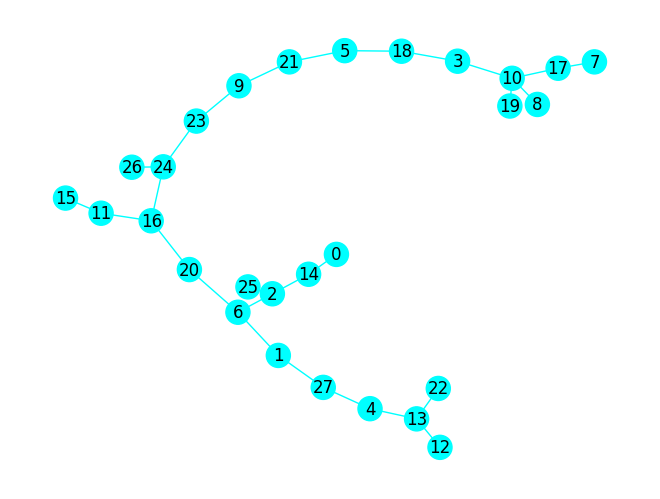

In [10]:
dtan.draw_graph(inst, layout='spring')

Counterfactual

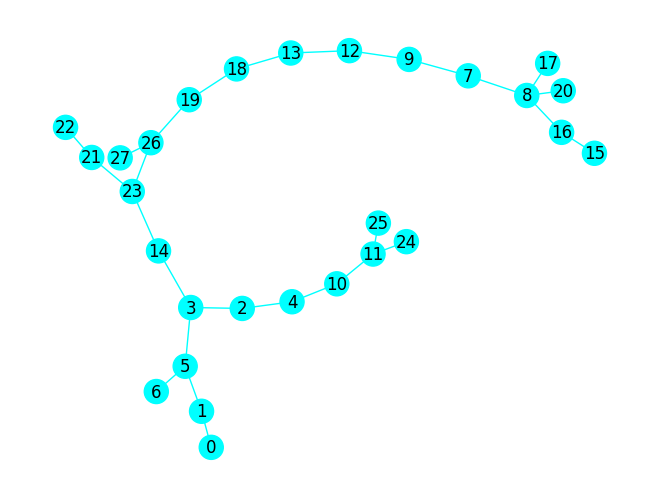

In [12]:
dtan.draw_graph(exp, layout='spring')

Difference between the original instance and the counterfactual

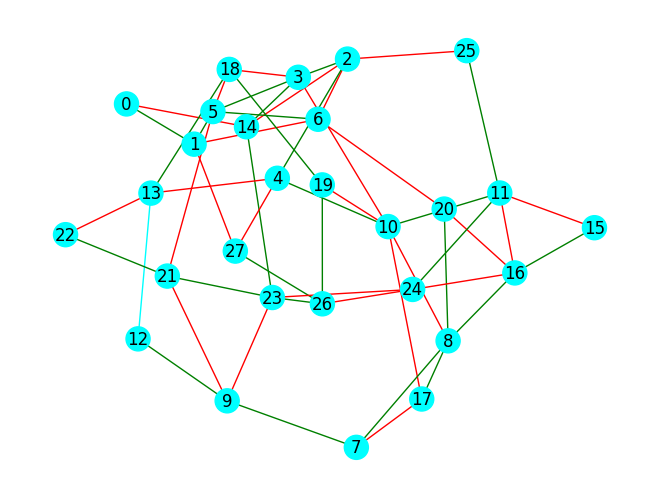

In [13]:
dtan.draw_counterfactual_actions(inst, exp, layout='spring')

In [14]:
exp._np_array

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [16]:
len(exp.graph.edges)

27

In [17]:
ev.get_instance_and_counterfactual_classifications()

[{'instance_id': 0,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 1,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 2,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 3,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 4,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 5,
  'ground_truth_label': 0,
  'instance_label': 0,
  'counterfactual_label': 0},
 {'instance_id': 6,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 7,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 8,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
 {'instance_id': 9,
  'ground_truth_label': 1,
  'instance_label': 1,
  'counterfactual_label': 1},
